In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir('/Users/alisdghnia/Desktop/')
df = pd.read_hdf('all text.h5')
df

# TFIDF

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import glob
import re
import os
from io import StringIO
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
import PyPDF2

In [205]:
tfidf = TfidfVectorizer(max_df=0.1, min_df=5, lowercase= True, stop_words='english')
features = tfidf.fit_transform(df['test']).toarray()
words = tfidf.get_feature_names()
# labels = df.category_id
print(features.shape)

tfidf_df = pd.DataFrame(features, columns=words)

(1838, 21971)


/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [196]:
tfidf_df

,aac,aba,abadi,abandons,abcd,abci,abdelmalek,abdul,abft,abides,...,ﬂagship,ﬂash,ﬂexi,ﬂip,ﬂoat,ﬂoatingpoint,ﬂooded,ﬂoor,ﬂourishing,ﬂowchart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.250364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
success = pd.read_csv('Coin-Price-Match 0-1838 - ALL.csv')
success.drop(columns= 'Unnamed: 0', inplace=True)
success

,coin_whitepaper_name,coin_name_on_web,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap
0,0chain - Whitepaper.pdf,0Chain,ZCN,$0.18,"$8,702,623","$90,347","400,000,000","200,000,000","$71,921,043"
1,0x - Whitepaper.pdf,0x,ZRX,$0.17,"$147,120,661","$21,811,197","1,000,000,000","1,000,000,000","$173,594,508"
2,0xbitcoin - Whitepaper.pdf,0xBitcoin,0xBTC,$0.15,"$1,492,573","$73,508","20,999,810","9,706,750","$3,229,067"
3,0xcert - Whitepaper.pdf,0xcert,ZXC,Nan,NaN,NaN,NaN,NaN,NaN
4,12Ships - Whitepaper.pdf,12Ships,TSHP,$0.00,"$270,816","$24,352","5,000,000,000","4,980,527,200","$377,918"
...,...,...,...,...,...,...,...,...,...
1833,ZMINE - Whitepaper.pdf,ZMINE,ZMN,$0.00,"$948,804",- -,--,"212,705,508","$948,804"
1834,Zoin - Whitepaper.pdf,Zoin,ZOI,$0.04,- -,- -,"21,000,000","18,544,491",- -
1835,ZPER - Whitepaper.pdf,ZPER,ZPR,$0.00,"$15,691",- -,--,"1,850,000,000","$23,070"
1836,ZrCoin - Whitepaper.pdf,ZrCoin,ZRC,Nan,NaN,NaN,NaN,NaN,NaN


In [121]:
success_copy = success.copy()

## MARKET CAP

In [122]:
def ConvertInt(x):
    if type(x) == str:
        x = x.replace('$','')
        x = x.replace(',','')
        x = x.replace('Nan', '0')
        x = x.replace("- -", '0')
        x = x.strip()
        x = float(x)
    
    return x


In [139]:
success_copy.market_cap = success_copy.market_cap.apply(lambda x: ConvertInt(x))
success_copy.market_cap.fillna(value=0, inplace=True)

In [140]:
success_copy.market_cap = pd.to_numeric(success_copy.market_cap)

In [141]:
success_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   coin_whitepaper_name      1830 non-null   object 
 1   coin_name_on_web          1812 non-null   object 
 2   coin_symbol               1812 non-null   object 
 3   coin_price                1830 non-null   float64
 4   market_cap                1830 non-null   float64
 5   volume                    1290 non-null   object 
 6   max_supply                1278 non-null   object 
 7   total_supply              1278 non-null   object 
 8   fully_diluted_market_cap  1290 non-null   object 
dtypes: float64(2), object(7)
memory usage: 128.8+ KB


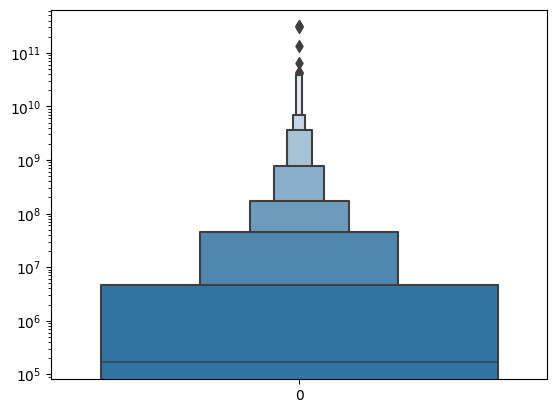

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxenplot(success_copy.market_cap)

plt.yscale('log')

In [148]:
median = np.median(success_copy.market_cap)
median

165526.0

In [147]:
percentile75 = np.percentile(success_copy.market_cap, 75)
percentile75

4552051.5

## PRICE

In [142]:
# success_copy.coin_price = success_copy.coin_price.apply(lambda x: x.replace('$', ''))
# success_copy.coin_price = success_copy.coin_price.apply(lambda x: x.replace(',', ''))
# success_copy.coin_price = success_copy.coin_price.apply(lambda x: x.strip())
# success_copy.coin_price.replace('Nan', 0, inplace = True)
success_copy.coin_price = success_copy.coin_price.apply(lambda x: ConvertInt(x))
success_copy.coin_price.fillna(value=0, inplace=True)

success_copy = success_copy.drop(index=450)
success_copy.reset_index(inplace=True, drop=True)
success_copy = success_copy.drop(index=734)
success_copy.reset_index(inplace=True, drop=True)
success_copy = success_copy.drop(index=839)
success_copy.reset_index(inplace=True, drop=True)
success_copy = success_copy.drop(index=1430)
success_copy.reset_index(inplace=True, drop=True)
success_copy.coin_price = pd.to_numeric(success_copy.coin_price)

In [143]:
median = np.median(success_copy.coin_price)
median

0.0

In [18]:
percentile75 = np.percentile(success_copy.coin_price, 75)
percentile75

0.03

In [51]:
percentile80 = np.percentile(success_copy.coin_price, 80)
percentile80

0.08

<AxesSubplot: >

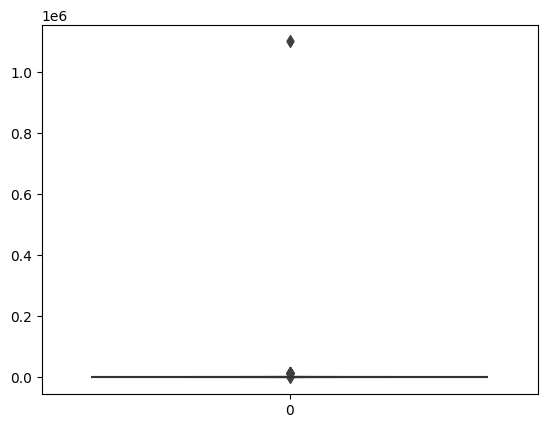

In [20]:
import seaborn as sns

sns.boxenplot(success_copy.coin_price)

In [144]:
success_copy_2 = success_copy[success_copy.coin_price < 500]

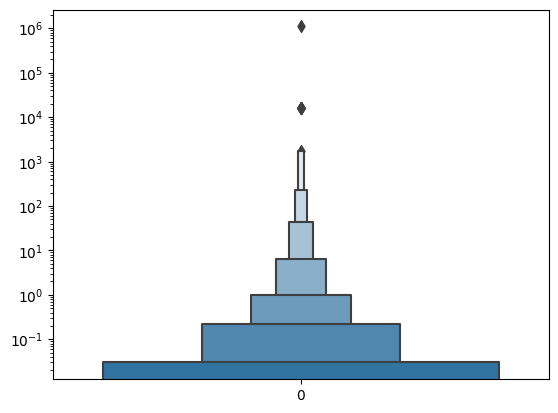

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxenplot(success_copy.coin_price)

plt.yscale('log')

In [38]:
median = np.median(success_copy_2.coin_price)
median

0.0

In [40]:
percentile75 = np.percentile(success_copy_2.coin_price, 75)
percentile75

0.03

In [54]:
mean = np.mean(success_copy_2.coin_price)
mean

1.5237980241492866

# CREATE SUCCESS COLUMN WITH MARKET CAP MEDIAN

In [149]:
success_copy['success_marketcap_median'] = np.where(success_copy.market_cap < median, 0, 1)

In [150]:
success_copy

,coin_whitepaper_name,coin_name_on_web,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap,success_marketcap_median
0,0chain - Whitepaper.pdf,0Chain,ZCN,0.18,8702623.0,"$90,347","400,000,000","200,000,000","$71,921,043",1
1,0x - Whitepaper.pdf,0x,ZRX,0.17,147120661.0,"$21,811,197","1,000,000,000","1,000,000,000","$173,594,508",1
2,0xbitcoin - Whitepaper.pdf,0xBitcoin,0xBTC,0.15,1492573.0,"$73,508","20,999,810","9,706,750","$3,229,067",1
3,0xcert - Whitepaper.pdf,0xcert,ZXC,0.00,0.0,NaN,NaN,NaN,NaN,0
4,12Ships - Whitepaper.pdf,12Ships,TSHP,0.00,270816.0,"$24,352","5,000,000,000","4,980,527,200","$377,918",1
...,...,...,...,...,...,...,...,...,...,...
1821,ZMINE - Whitepaper.pdf,ZMINE,ZMN,0.00,948804.0,- -,--,"212,705,508","$948,804",1
1822,Zoin - Whitepaper.pdf,Zoin,ZOI,0.04,0.0,- -,"21,000,000","18,544,491",- -,0
1823,ZPER - Whitepaper.pdf,ZPER,ZPR,0.00,15691.0,- -,--,"1,850,000,000","$23,070",0
1824,ZrCoin - Whitepaper.pdf,ZrCoin,ZRC,0.00,0.0,NaN,NaN,NaN,NaN,0


# MERGE

In [206]:
df2 = pd.merge(success_copy, tfidf_df, left_index=True, right_index=True)

In [207]:
df2

,coin_whitepaper_name,coin_name_on_web,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap,success_marketcap_median,...,ﬂowchart,ﬂowing,ﬂows,ﬂuctuate,ﬂuctuates,ﬂuctuating,ﬂuctuation,ﬂuctuations,ﬂuid,ﬂy
0,0chain - Whitepaper.pdf,0Chain,ZCN,0.18,8702623.0,"$90,347","400,000,000","200,000,000","$71,921,043",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x - Whitepaper.pdf,0x,ZRX,0.17,147120661.0,"$21,811,197","1,000,000,000","1,000,000,000","$173,594,508",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0xbitcoin - Whitepaper.pdf,0xBitcoin,0xBTC,0.15,1492573.0,"$73,508","20,999,810","9,706,750","$3,229,067",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0xcert - Whitepaper.pdf,0xcert,ZXC,0.00,0.0,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12Ships - Whitepaper.pdf,12Ships,TSHP,0.00,270816.0,"$24,352","5,000,000,000","4,980,527,200","$377,918",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,ZMINE - Whitepaper.pdf,ZMINE,ZMN,0.00,948804.0,- -,--,"212,705,508","$948,804",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1822,Zoin - Whitepaper.pdf,Zoin,ZOI,0.04,0.0,- -,"21,000,000","18,544,491",- -,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,ZPER - Whitepaper.pdf,ZPER,ZPR,0.00,15691.0,- -,--,"1,850,000,000","$23,070",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1824,ZrCoin - Whitepaper.pdf,ZrCoin,ZRC,0.00,0.0,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [209]:
X = df2.iloc[:, 10:]
y = df2.iloc[:, 9]

In [210]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1821    1
1822    0
1823    0
1824    0
1825    0
Name: success_marketcap_median, Length: 1826, dtype: int64

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [212]:
mlp_clf = MLPClassifier(activation= 'relu', solver= 'adam', max_iter= 1000, hidden_layer_sizes=(100, 100, ), verbose=False)
mlp_clf.fit(X_train, y_train)
mlp_predict = mlp_clf.predict(X_test)
print(confusion_matrix(y_test, mlp_predict))
print(classification_report(y_test, mlp_predict))
print(accuracy_score(y_test, mlp_predict))

[[84 89]
 [95 98]]
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       173
           1       0.52      0.51      0.52       193

    accuracy                           0.50       366
   macro avg       0.50      0.50      0.50       366
weighted avg       0.50      0.50      0.50       366

0.4972677595628415


In [213]:
log_reg = LogisticRegression(penalty= 'l2', solver= 'lbfgs')
log_reg.fit(X_train, y_train)
logreg_predict = log_reg.predict(X_test)
print(confusion_matrix(y_test, logreg_predict))
print(classification_report(y_test, logreg_predict))

[[102  71]
 [111  82]]
              precision    recall  f1-score   support

           0       0.48      0.59      0.53       173
           1       0.54      0.42      0.47       193

    accuracy                           0.50       366
   macro avg       0.51      0.51      0.50       366
weighted avg       0.51      0.50      0.50       366



In [214]:
nb_clf = MultinomialNB(alpha=0)
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(X_test)
print(confusion_matrix(y_test, nb_predict))
print(classification_report(y_test, nb_predict))

[[89 84]
 [97 96]]
              precision    recall  f1-score   support

           0       0.48      0.51      0.50       173
           1       0.53      0.50      0.51       193

    accuracy                           0.51       366
   macro avg       0.51      0.51      0.51       366
weighted avg       0.51      0.51      0.51       366



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [217]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rfclf_predict = rf_clf.predict(X_test)
print(confusion_matrix(y_test, logreg_predict))
print(classification_report(y_test, logreg_predict))

[[ 98  75]
 [100  93]]
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       173
           1       0.55      0.48      0.52       193

    accuracy                           0.52       366
   macro avg       0.52      0.52      0.52       366
weighted avg       0.53      0.52      0.52       366

